XGBoost

In [1]:
import pandas as pd

DATASET_PATH = "dataset.json"

btc_price_history = pd.read_json(DATASET_PATH)

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

interval = "1m"

close_timestamps = pd.to_datetime(btc_price_history[interval]["ct"], unit='ms')
close_prices = btc_price_history[interval]["c"]

X = close_timestamps.values.astype(int).reshape(-1, 1)
y = close_prices

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.01)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r_squared}")

Mean Squared Error: 257009487.0685657
Root Mean Squared Error (RMSE): 16031.515432689628
R-squared (R²): -1.3112954323268866e-05


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

best_params

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

In [24]:
import datetime

prediction_date = datetime.datetime(2022, 9, 1)

epoch_timestamp = int(prediction_date.timestamp() * 1000)

X_prediction = [[epoch_timestamp]]

predicted_price = best_xgb_model.predict(X_prediction)

predicted_price

array([20217.916], dtype=float32)

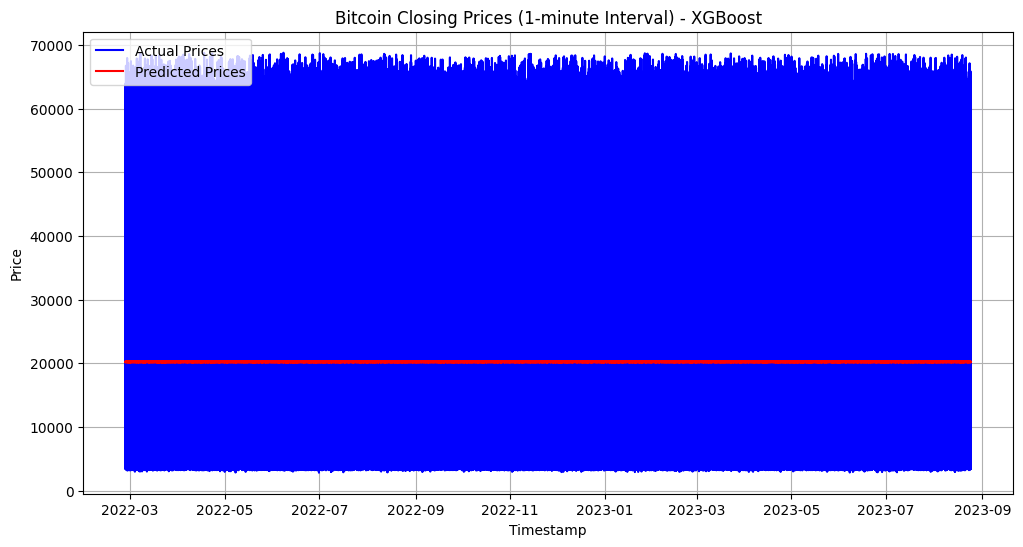

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(close_timestamps[-len(y_test):], y_test, color='blue', label='Actual Prices')
plt.plot(close_timestamps[-len(y_test):], y_pred, color='red', label='Predicted Prices')
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title("Bitcoin Closing Prices (1-minute Interval) - XGBoost")
plt.legend()
plt.grid(True)
plt.show()